In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import StratifiedKFold
from utils import plot_result_score_model

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_csv("real_estate.csv")

In [5]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [7]:
df.set_index("No", inplace = True)

In [8]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

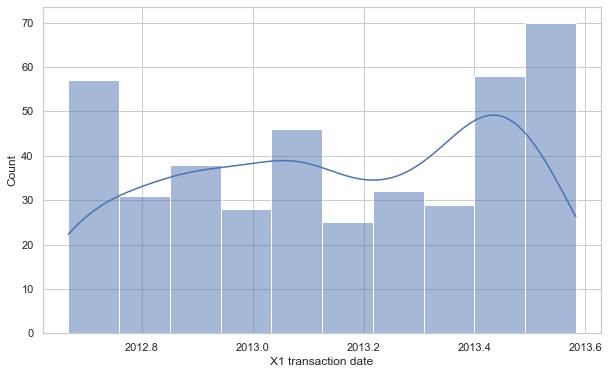

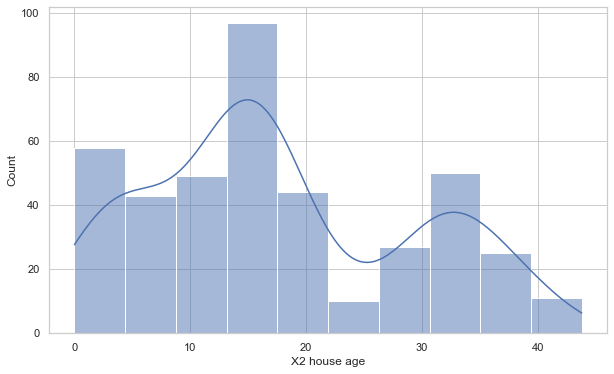

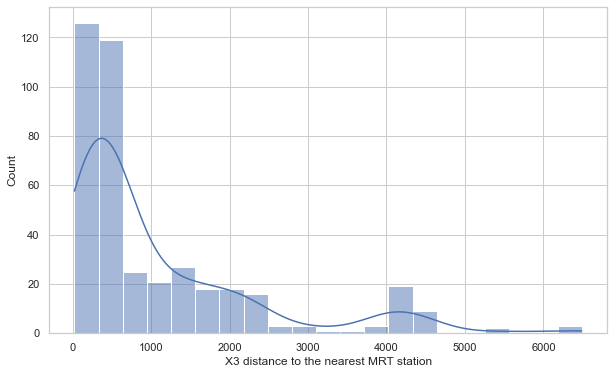

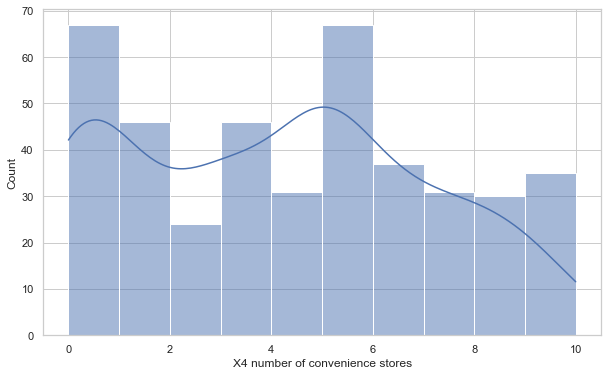

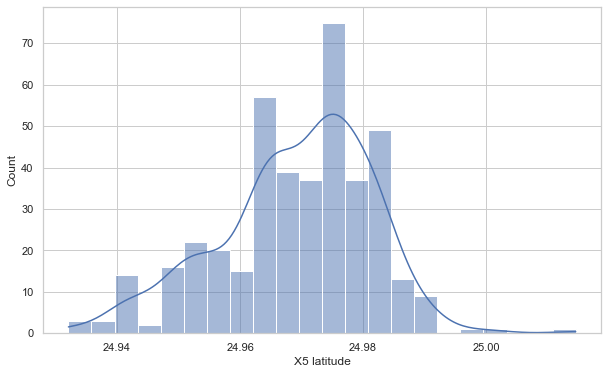

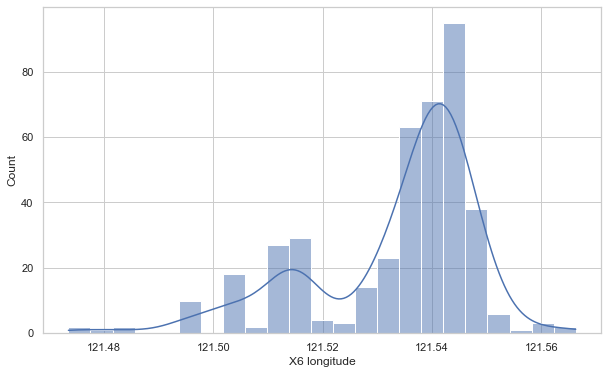

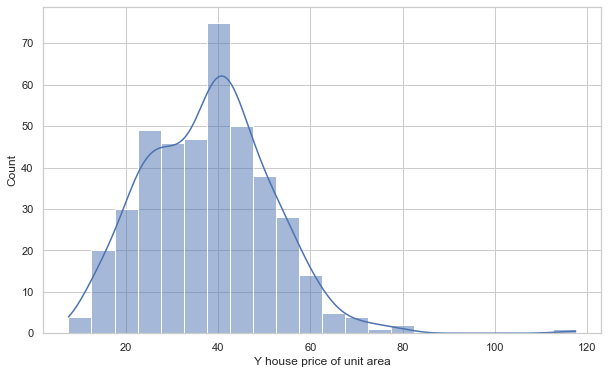

In [10]:
sns.set(style="whitegrid")
for col in df.columns:
    fig = plt.figure(figsize = (10,6))
    sns.histplot(data=df[col], kde=True)

In [11]:
corr = df.corr()

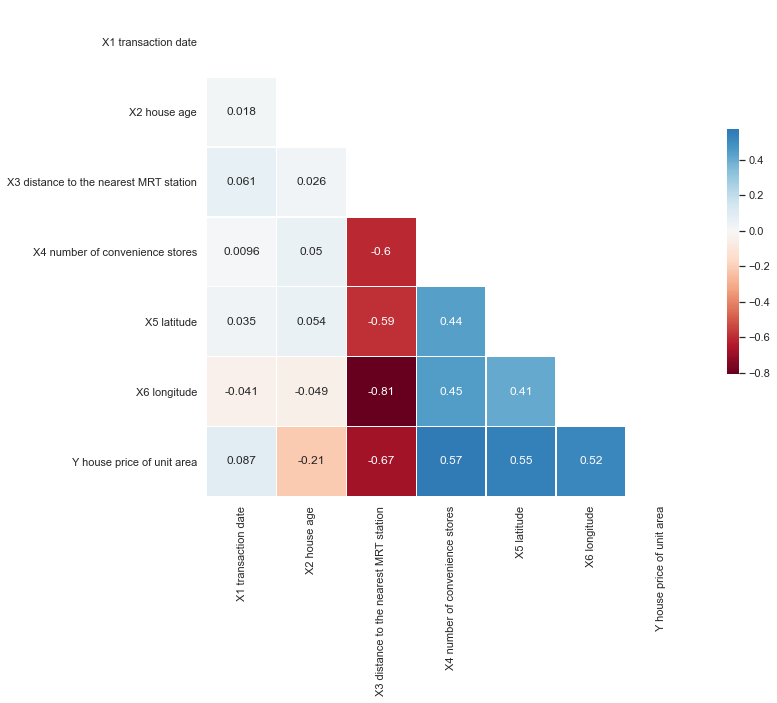

In [12]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = 'RdBu'

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
target = df["Y house price of unit area"]

In [14]:
features = df.drop("Y house price of unit area", axis=1)

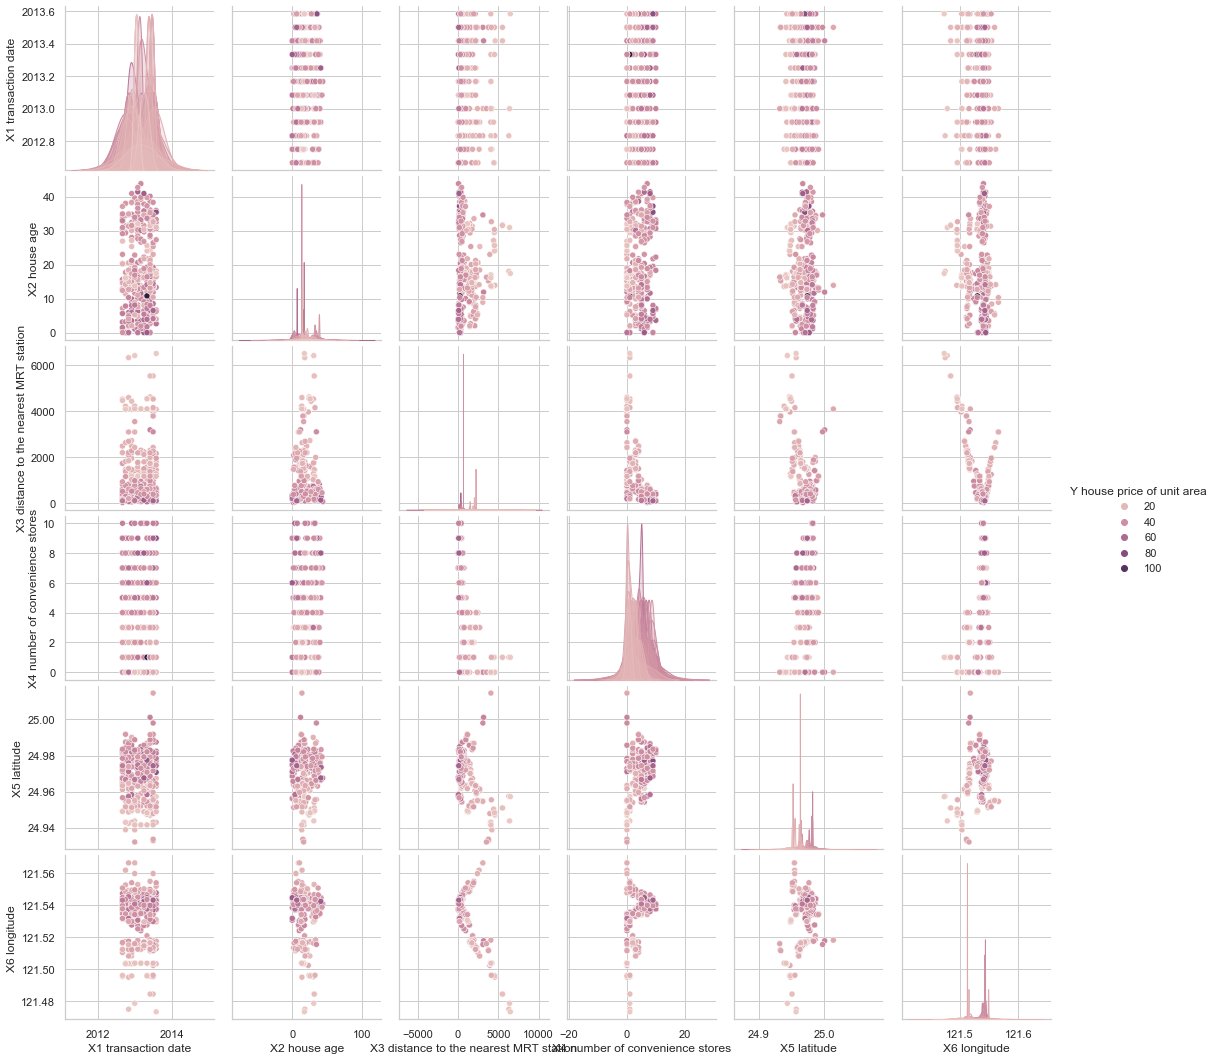

In [15]:
sns.pairplot(df, hue = "Y house price of unit area")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(features) 
features = scaler.transform(features) 

In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,StratifiedKFold

regr = SVR()

params = {
    'C': [0.1,0.8,1,10],
#     'kernel':["linear", "poly", "rbf", "sigmoid"],
    'kernel':["linear", "sigmoid", "rbf"],
    'gamma' :[0.05,0.1,0.8,1,5,10]
#     'gamma':['scale', 'auto']
}
scoring = ["neg_mean_absolute_error", "neg_root_mean_squared_error", "max_error", "r2"]

best_classifier = GridSearchCV(
        regr, 
        params,
        scoring=scoring,
        cv=10,
        refit="r2", 
        n_jobs=-1, 
        return_train_score=True,
        verbose=3
        )

best_classifier.fit(features,target)

results = best_classifier.cv_results_
best_params = best_classifier.best_params_

print(type(regr).__name__)
print("\n")
print("Best scores:")
print(best_classifier.best_score_)
print("Best params:")
print(best_params)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
SVR


Best scores:
0.6776354526365818
Best params:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


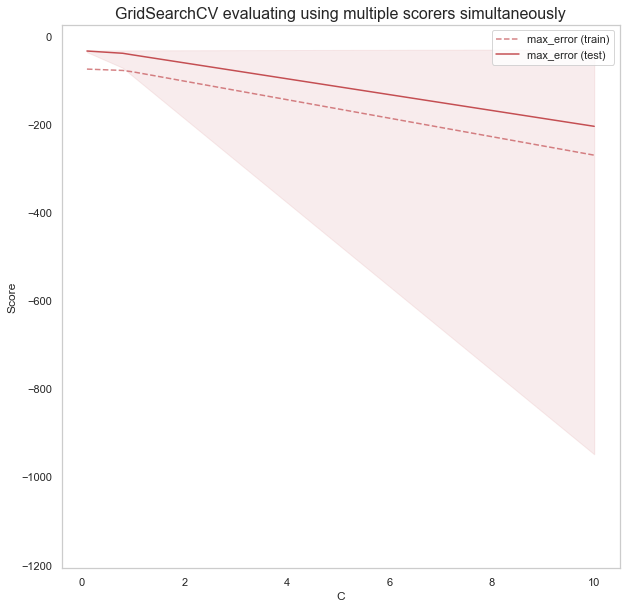

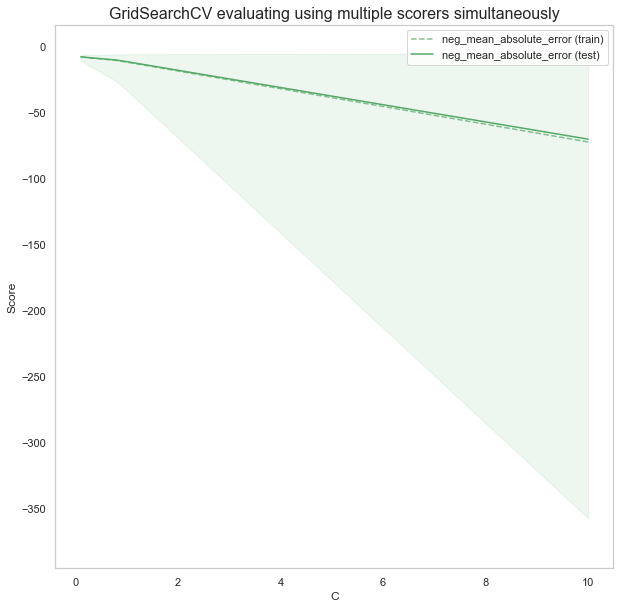

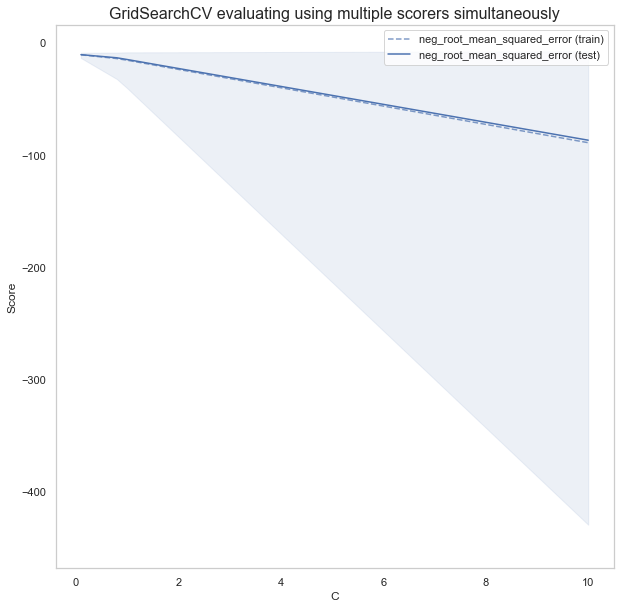

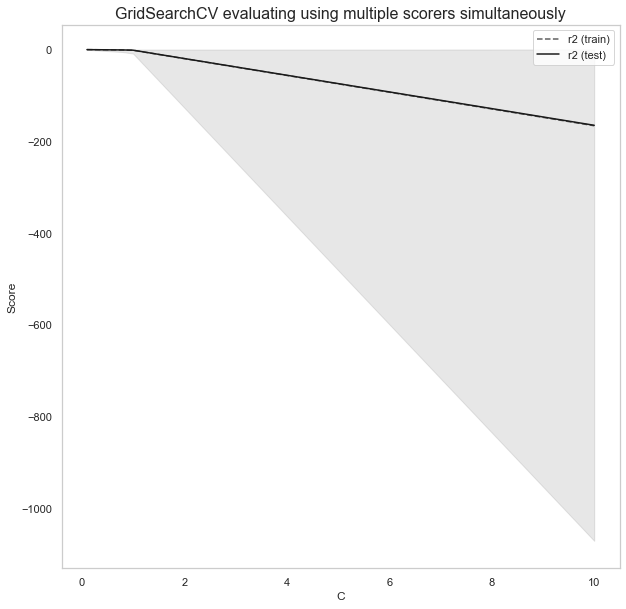

In [63]:
plot_result_score_model(results, scoring, 'C')

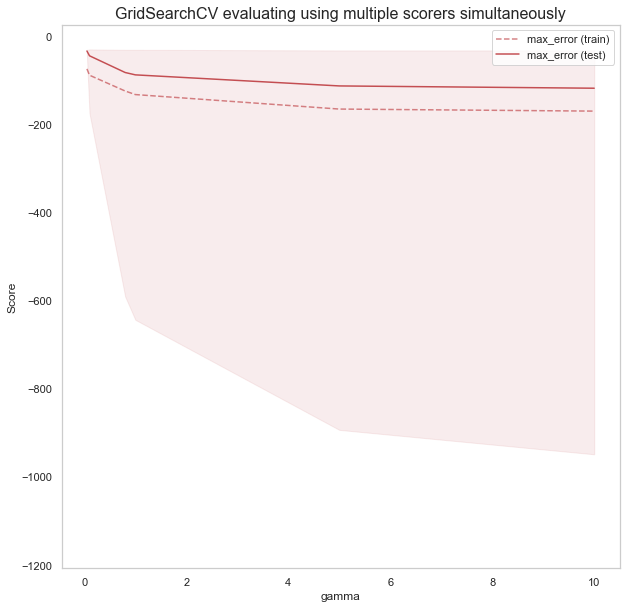

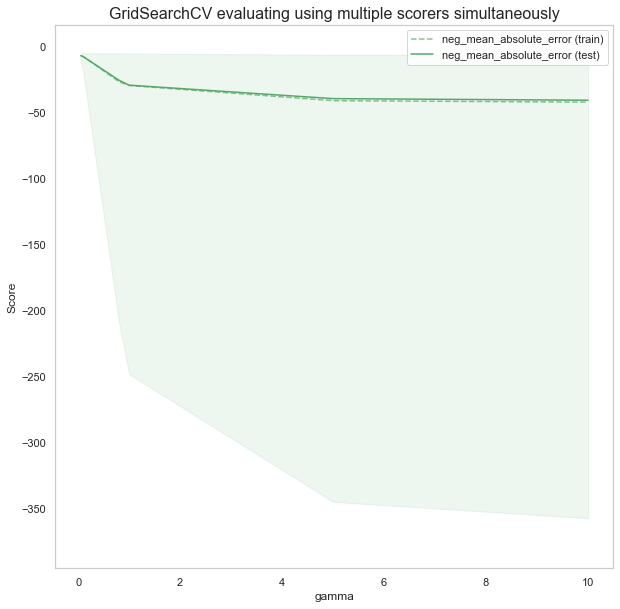

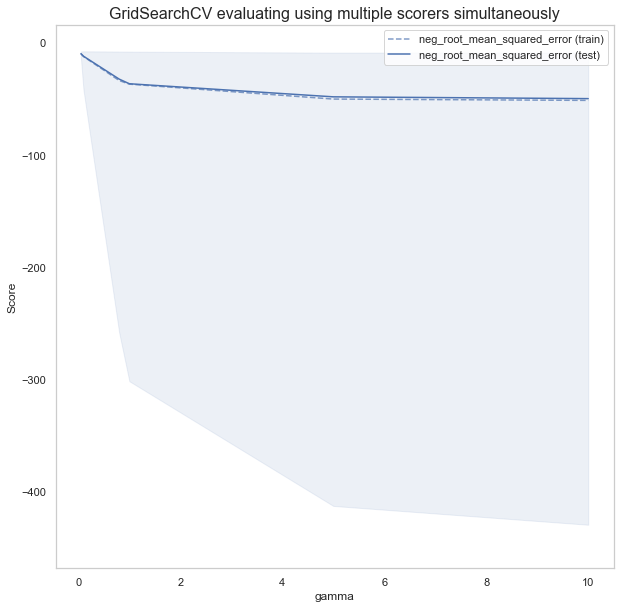

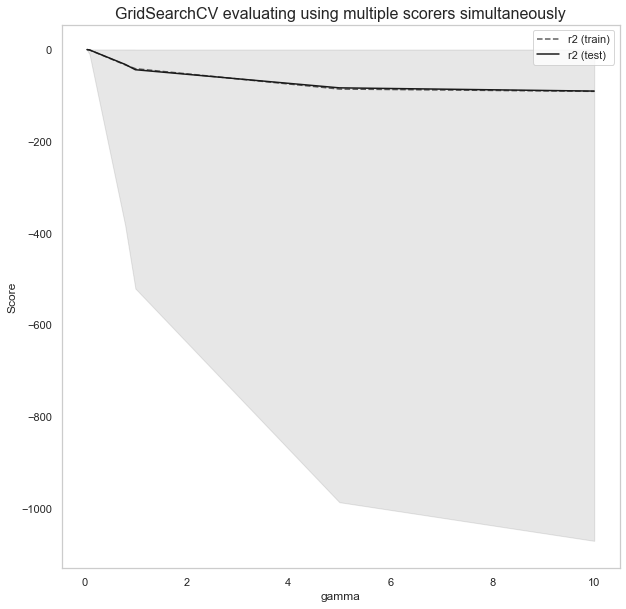

In [64]:
plot_result_score_model(results, scoring, 'gamma')

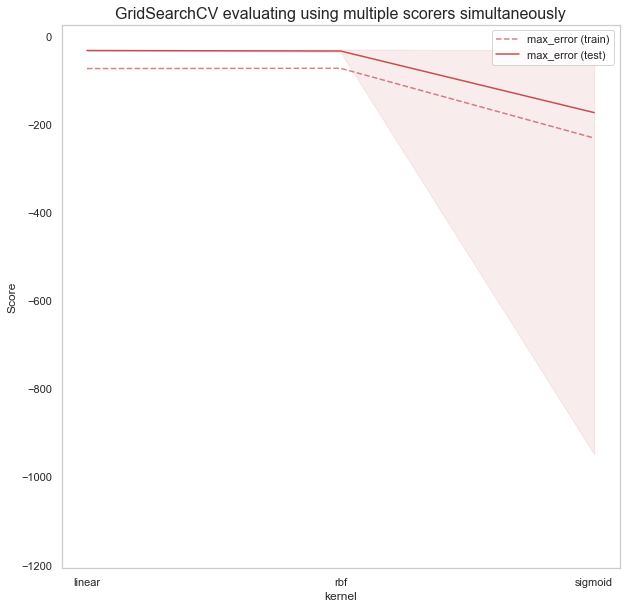

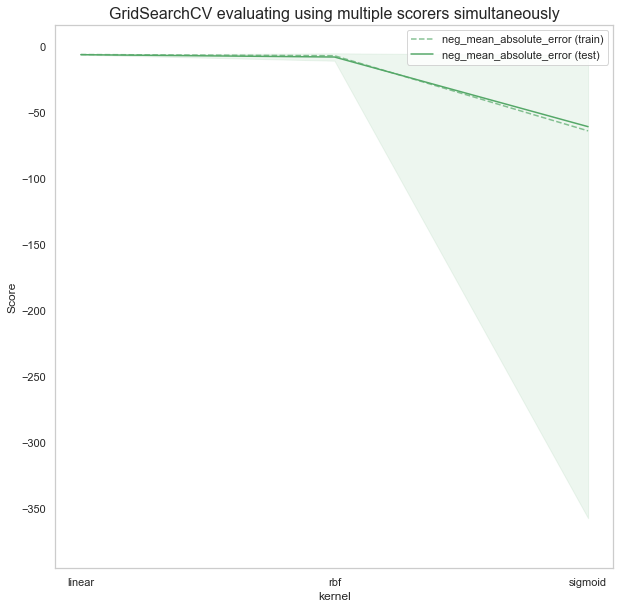

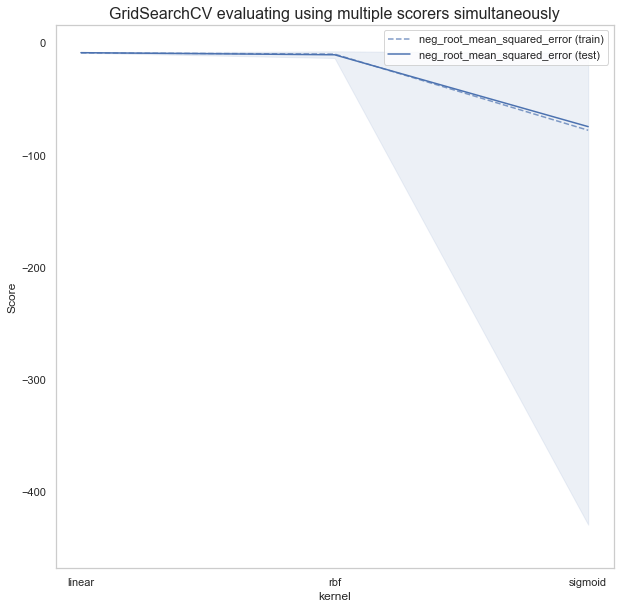

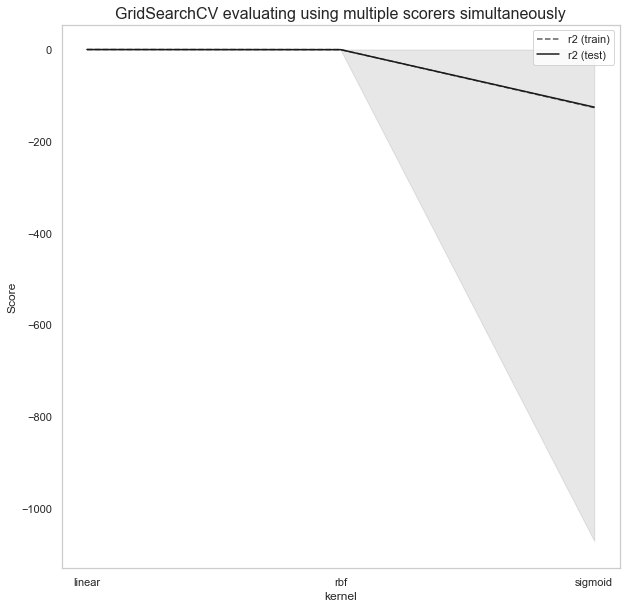

In [65]:
plot_result_score_model(results, scoring, 'kernel')